# Formative Coursework

## 1st question: 

### In the year 2020, which of the countries with available data had (a) the smallest and (b) the largest population sizes?

In [1]:
### import the module: pandas
import pandas as pd

In [2]:
### load the dataset
country_code = pd.read_csv("country_codes")
pop = pd.read_csv("pop")

### check the variables of two dataframe
print(pop.head(), country_code.head())

### make the columns of country_code capitalize
country_code.columns = map(str.capitalize, country_code.columns)
country_code.head()

   Country  Admin1 SubDiv  Year  Sex  Frmat       Pop1      Pop2      Pop3  \
0     1060     NaN    NaN  1980    1      7   137100.0    3400.0   15800.0   
1     1060     NaN    NaN  1980    2      7   159000.0    4000.0   18400.0   
2     1125     NaN    NaN  1955    1      2  5051500.0  150300.0  543400.0   
3     1125     NaN    NaN  1955    2      2  5049400.0  145200.0  551000.0   
4     1125     NaN    NaN  1956    1      2  5353700.0  158700.0  576600.0   

   Pop4  ...     Pop18    Pop19    Pop20    Pop21    Pop22    Pop23  Pop24  \
0   NaN  ...       NaN   5300.0      NaN   2900.0      NaN      NaN    NaN   
1   NaN  ...       NaN   6200.0      NaN   3400.0      NaN      NaN    NaN   
2   NaN  ...  110200.0  51100.0  41600.0  14300.0  11800.0  25300.0    NaN   
3   NaN  ...  122100.0  51100.0  50700.0  15800.0  18000.0  28500.0    NaN   
4   NaN  ...  116900.0  54100.0  44000.0  14900.0  12400.0  26600.0    NaN   

   Pop25   Pop26        Lb  
0    NaN  6500.0    5000.0  
1   

,Country,Name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [3]:
### merge two dataframe 
country_pop = pd.merge(country_code, pop, how="outer", on="Country")
country_pop.head()

### slice the dataframe to only include country, name, year, pop1 and drop any NA value
ex1 = country_pop[["Country", "Name", "Year", "Pop1"]].dropna()

### select the rows of pop so that year = 2020 and use sort function to find the smallest and the largest population
ex1[ex1.Year == 2020].sort_values(by="Pop1")

,Country,Name,Year,Pop1
3854,3350,Singapore,2020.0,0.0
8253,4275,San Marino,2020.0,16594.0
8254,4275,San Marino,2020.0,17021.0
7209,4205,Monaco,2020.0,18242.0
7210,4205,Monaco,2020.0,19067.0
...,...,...,...,...
9200,4310,"United Kingdom, England and Wales",2020.0,30173382.0
9055,4308,United Kingdom,2020.0,33143500.0
9056,4308,United Kingdom,2020.0,33935034.0
5659,4085,Germany,2020.0,41032066.0


### Based on the table above, San Marino has the smallest population size(16594) and Germany has the largest population size(42128805).

## 2nd question:
### Create a loop that merges all the ICD10 mortality files (parts 1 – 5) into one single dataframe.

In [4]:
### load the file icd10 part 1-5
part1 = pd.read_csv("Morticd10_part1")
part2 = pd.read_csv("Morticd10_part2")
part3 = pd.read_csv("Morticd10_part3")
part4 = pd.read_csv("Morticd10_part4")
part5 = pd.read_csv("Morticd10_part5")

C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\1902034032.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  part1 = pd.read_csv("Morticd10_part1")
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\1902034032.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  part2 = pd.read_csv("Morticd10_part2")
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\1902034032.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  part3 = pd.read_csv("Morticd10_part3")
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\1902034032.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  part4 = pd.read_csv("Morticd10_part4")
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\1902034032.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
 

In [5]:
### use for loop to merge dataframe
morticd = [part1, part2, part3, part4, part5]
icd10 = pd.concat([morticd[i] for i in range(5)], axis=0)

### merge the icd10 with country_code
q2_df= icd10.merge(country_code, how="outer", on="Country")

###  How many unique rows are in the merged dataframe? 

In [6]:
len(icd10.index)

4541707

###  Create a timeline plot examining all-age mortality from all causes contained within the diseases of the respiratory system chapter of ICD-10.

In [7]:
### Diseases of the respiratory system chapter of ICD-10 range from J00-J99, coded in cause between 1072 and 1077
resp_code = ["1072", "1073", "1074", "1075", "1076", "1077"]

### slice the dataframe so that only includes mortality from respiratory disease
resp_death = icd10[icd10.Cause.isin(resp_code)]

In [8]:
### group by year and country and sum the death at all ages(Deaths1)
my_df = resp_death.groupby(["Year","Country"]).sum()
my_df.reset_index(inplace=True)

C:\Users\ZHANG\AppData\Local\Temp\ipykernel_15796\2129389291.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  my_df = resp_death.groupby(["Year","Country"]).sum()


In [9]:
### import matplotlib
from matplotlib import pyplot as plt

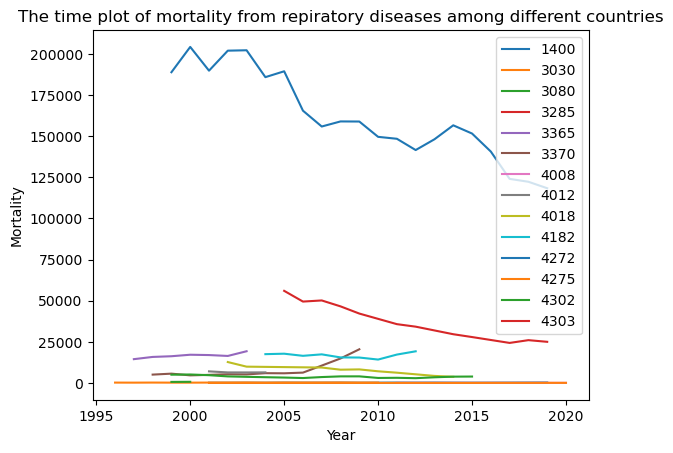

In [10]:
### use for loop to plot line chart for each country
for country,data in my_df.groupby('Country'):
    plt.plot(data['Year'], data['Deaths1'], label=country)

plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Mortality")
plt.title("The time plot of mortality from repiratory diseases among different countries")
plt.show()

### Show data from countries that start with the letter ‘U’and discuss your findings

In [11]:
### merge my_df with country_code
df = pd.merge(my_df, country_code, how='left', on='Country').dropna(subset=['Name'])

### select Name starts with 'U'
### The dataframe only includes Ukraine
ukr = df[df.Name.str.startswith('U')]

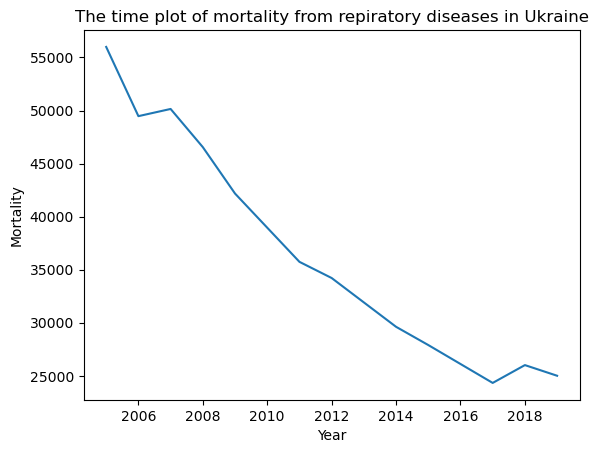

In [12]:
### draw the time plot of ukraine
plt.plot(ukr['Year'], ukr['Deaths1'])

plt.xlabel("Year")
plt.ylabel("Mortality")
plt.title("The time plot of mortality from repiratory diseases in Ukraine")
plt.show()

### All in all, the mortality of respiratory diseases in Ukraine is decreasing. Though in 2006 and 2017, there were small increases.

## Third question:
### Define a function which returns the subset from the merged ICD-10 mortality data (created in Q2). The function input should be a specified country, cause, and range of years, and the merged dataset. 

In [13]:
### build mort_data function to return the subset data 
def mort_data(q2_df, country="United Kingdom", cause=1000, start=2010, end=2020):
    '''
    q2_df: the merged dataset of mortality data created in question 2
    country: the country you want to search
    cause: cause of death
    start: start year
    end: end year
    '''
    sub_df = q2_df[(q2_df.Name == country) & (q2_df.Cause == cause) & (q2_df.Year.between(start, end))]
    return sub_df

### return data for mortality caused by the ICD-10 code J180 (Pneumonia), for each year between 2010-2020 only for the United Kingdom and France.

In [14]:
### The mortality data of UK
mort_data(q2_df, ("United Kingdom"), "J180", 2010, 2020)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Name
3789949,4308,NaN,NaN,2010.0,104,J180,1.0,0.0,1.0,5439.0,...,986.0,1341.0,1021.0,585.0,0.0,0.0,0.0,1.0,5.0,United Kingdom
3789950,4308,NaN,NaN,2010.0,104,J180,2.0,0.0,1.0,8856.0,...,1225.0,2145.0,2241.0,1979.0,0.0,0.0,0.0,0.0,3.0,United Kingdom
3794715,4308,NaN,NaN,2011.0,104,J180,1.0,0.0,1.0,5451.0,...,997.0,1342.0,1153.0,554.0,0.0,0.0,0.0,0.0,7.0,United Kingdom
3794716,4308,NaN,NaN,2011.0,104,J180,2.0,0.0,1.0,8675.0,...,1129.0,2092.0,2318.0,1926.0,0.0,0.0,0.0,0.0,1.0,United Kingdom
3799583,4308,NaN,NaN,2012.0,104,J180,1.0,0.0,1.0,5606.0,...,950.0,1357.0,1265.0,633.0,0.0,0.0,0.0,0.0,7.0,United Kingdom
3799584,4308,NaN,NaN,2012.0,104,J180,2.0,0.0,1.0,8572.0,...,1152.0,1955.0,2493.0,1898.0,0.0,0.0,0.0,0.0,5.0,United Kingdom
3804325,4308,NaN,NaN,2013.0,104,J180,1.0,0.0,1.0,5442.0,...,965.0,1239.0,1260.0,585.0,0.0,0.0,0.0,0.0,9.0,United Kingdom
3804326,4308,NaN,NaN,2013.0,104,J180,2.0,0.0,1.0,8292.0,...,1041.0,1887.0,2432.0,1838.0,0.0,0.0,0.0,0.0,4.0,United Kingdom
3809137,4308,NaN,NaN,2014.0,104,J180,1.0,0.0,1.0,5042.0,...,854.0,1168.0,1140.0,501.0,0.0,0.0,0.0,0.0,0.0,United Kingdom
3809138,4308,NaN,NaN,2014.0,104,J180,2.0,0.0,1.0,7210.0,...,962.0,1573.0,2090.0,1468.0,0.0,0.0,0.0,0.0,3.0,United Kingdom


In [15]:
### The mortality data of France
mort_data(q2_df, ("France"), "J180", 2010, 2020)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Name
2871913,4080,NaN,NaN,2010.0,104,J180,1.0,0.0,1.0,720.0,...,149.0,223.0,115.0,85.0,0.0,0.0,0.0,0.0,2.0,France
2871914,4080,NaN,NaN,2010.0,104,J180,2.0,0.0,1.0,1038.0,...,137.0,296.0,208.0,309.0,0.0,0.0,0.0,0.0,0.0,France
2876745,4080,NaN,NaN,2011.0,104,J180,1.0,0.0,1.0,682.0,...,130.0,193.0,149.0,71.0,0.0,0.0,0.0,0.0,0.0,France
2876746,4080,NaN,NaN,2011.0,104,J180,2.0,0.0,1.0,845.0,...,112.0,196.0,218.0,243.0,0.0,0.0,0.0,0.0,0.0,France
2881315,4080,NaN,NaN,2012.0,104,J180,1.0,0.0,1.0,786.0,...,142.0,232.0,185.0,96.0,0.0,0.0,0.0,0.0,0.0,France
2881316,4080,NaN,NaN,2012.0,104,J180,2.0,0.0,1.0,1124.0,...,114.0,304.0,343.0,279.0,0.0,0.0,0.0,0.0,0.0,France
2885892,4080,NaN,NaN,2013.0,104,J180,1.0,0.0,1.0,683.0,...,107.0,183.0,208.0,78.0,0.0,0.0,0.0,0.0,0.0,France
2885893,4080,NaN,NaN,2013.0,104,J180,2.0,0.0,1.0,958.0,...,114.0,237.0,324.0,219.0,0.0,0.0,0.0,0.0,0.0,France
2890529,4080,NaN,NaN,2014.0,104,J180,1.0,0.0,1.0,630.0,...,113.0,167.0,171.0,79.0,0.0,0.0,0.0,0.0,0.0,France
2890530,4080,NaN,NaN,2014.0,104,J180,2.0,0.0,1.0,862.0,...,87.0,215.0,302.0,195.0,0.0,0.0,0.0,0.0,0.0,France


### How many rows of data does the function return in each case?

### For uk subdataset, there are 22 rows., and for France subdataset, there are 16 rows
